In [2]:
import xarray as xr
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
#import cmocean
import glob
import os
import pandas as pd

obs_ssdflux_path="/Volumes/Thalassa/ERA5_data/SSDflux_rg/"
obs_curl_path="/Volumes/Thalassa/ORAS5/ORAS5_wind_stress_curl_rg/"
obs_wsm_path="/Volumes/Thalassa/ORAS5/ORAS5_wind_stress_magnitude_rg/"
obs_shdr_path="/Volumes/Thalassa/CORA_SHDR_rg/"

obs_shdr=xr.open_mfdataset(sorted(glob.glob(obs_shdr_path+'*.nc'))).load()
obs_curl=xr.open_mfdataset(sorted(glob.glob(obs_curl_path+'*.nc'))).load()
obs_wsm=xr.open_mfdataset(sorted(glob.glob(obs_wsm_path+'*.nc'))).load()
obs_ssdflux=xr.open_dataset(obs_ssdflux_path+'SSDflux_ERA5_ORAS5.nc').load()


# --- Compute Climatology (Monthly Means) ---
obs_shdr_clim = obs_shdr.groupby('time.month').mean(dim='time')
obs_curl_clim = obs_curl.groupby('time_counter.month').mean(dim='time_counter')
obs_ssdflux_clim = obs_ssdflux.groupby('time.month').mean(dim='time')
obs_wsm_clim = obs_wsm.groupby('time_counter.month').mean(dim='time_counter')


cmip6_shdr_ens_all=xr.open_dataset("/Volumes/Thalassa/cmip6_clim_ens/shdr.nc")
cmip6_curl_ens_all=xr.open_dataset("/Volumes/Thalassa/cmip6_clim_ens/curl.nc")
cmip6_ssdflux_ens_all=xr.open_dataset("/Volumes/Thalassa/cmip6_clim_ens/ssdflux.nc")
cmip6_wsm_ens_all=xr.open_dataset("/Volumes/Thalassa/cmip6_clim_ens/wsm.nc")


In [41]:
season=[1,2,3,4,5,6,7,8,9,10,11,12]

wsm=cmip6_wsm_ens_all.wsm
wsm_obs=obs_wsm_clim.wsm
diff_wsm=cmip6_wsm_ens_all.wsm-obs_wsm_clim.wsm
std_wsm=cmip6_wsm_ens_all.wsm.std(dim='model')
#diff.plot(vmin=-0.04,vmax=0.04)

curl=cmip6_curl_ens_all.curl
curl_obs=obs_curl_clim.curl
diff_curl=cmip6_curl_ens_all.curl-obs_curl_clim.curl
std_curl=cmip6_curl_ens_all.curl.std(dim='model')
#diff.plot(vmin=-0.1e-8,vmax=0.1e-8)

Fs=cmip6_ssdflux_ens_all.Fs
Fs_obs=obs_ssdflux_clim.Fs
diff_Fs=cmip6_ssdflux_ens_all.Fs-obs_ssdflux_clim.Fs
std_Fs=cmip6_ssdflux_ens_all.Fs.std(dim='model')
#diff.plot(vmin=-0.01e-5,vmax=0.01e-5)

Ft=cmip6_ssdflux_ens_all.Ft
Ft_obs=obs_ssdflux_clim.Ft
diff_Ft=cmip6_ssdflux_ens_all.Ft-obs_ssdflux_clim.Ft
std_Ft=cmip6_ssdflux_ens_all.Ft.std(dim='model')
#diff.plot(vmin=-0.1e-5,vmax=0.1e-5)

b3=cmip6_shdr_ens_all.sel(param='b3').shdr
b3_obs=obs_shdr_clim.sel(param='b3').shdr
diff_b3=cmip6_shdr_ens_all.sel(param='b3').shdr-obs_shdr_clim.sel(param='b3').shdr
std_b3=cmip6_shdr_ens_all.sel(param='b3').shdr.std(dim='model')
#diff.plot(vmin=-1e-3,vmax=1e-3)

D1=cmip6_shdr_ens_all.sel(param='D1').shdr
D1_obs=obs_shdr_clim.sel(param='D1').shdr
diff_D1=cmip6_shdr_ens_all.sel(param='D1').shdr-obs_shdr_clim.sel(param='D1').shdr
std_D1=cmip6_shdr_ens_all.sel(param='D1').shdr.std(dim='model')
#diff.plot(vmin=-50,vmax=50)

a1=cmip6_shdr_ens_all.sel(param='a1').shdr
a1_obs=obs_shdr_clim.sel(param='a1').shdr
diff_a1=cmip6_shdr_ens_all.sel(param='a1').shdr-obs_shdr_clim.sel(param='a1').shdr
std_a1=cmip6_shdr_ens_all.sel(param='a1').shdr.std(dim='model')

a2=abs(cmip6_shdr_ens_all.sel(param='a2').shdr)
a2_obs=abs(obs_shdr_clim.sel(param='a2').shdr)
diff_a2=abs(cmip6_shdr_ens_all.sel(param='a2').shdr)-abs(obs_shdr_clim.sel(param='a2').shdr)
std_a2=abs(cmip6_shdr_ens_all.sel(param='a2').shdr).std(dim='model')

a3=cmip6_shdr_ens_all.sel(param='a3').shdr
a3_obs=obs_shdr_clim.sel(param='a3').shdr
diff_a3=cmip6_shdr_ens_all.sel(param='a3').shdr-obs_shdr_clim.sel(param='a3').shdr
std_a3=cmip6_shdr_ens_all.sel(param='a3').shdr.std(dim='model')

diff_a1=diff_a1.drop_vars('param')
diff_D1=diff_D1.drop_vars('param')
diff_b3=diff_b3.drop_vars('param')
diff_a3=diff_a3.drop_vars('param')
diff_a2=diff_a2.drop_vars('param')

std_a1=std_a1.drop_vars('param')
std_D1=std_D1.drop_vars('param')
std_b3=std_b3.drop_vars('param')
std_a3=std_a3.drop_vars('param')
std_a2=std_a2.drop_vars('param')

a1=a1.drop_vars('param')
D1=D1.drop_vars('param')
b3=b3.drop_vars('param')
a3=a3.drop_vars('param')
a2=a2.drop_vars('param')

a1_obs=a1_obs.drop_vars('param')
D1_obs=D1_obs.drop_vars('param')
b3_obs=b3_obs.drop_vars('param')
a3_obs=a3_obs.drop_vars('param')
a2_obs=a2_obs.drop_vars('param')


In [42]:
all_bias=xr.merge([
    a1.rename('a1'),
    a2.rename('a2'),
    a3.rename('a3'),
    D1.rename('D1'),
    b3.rename('b3'),
    Fs.rename('Fs'),
    Ft.rename('Ft'),
    curl.rename('curl'),
    wsm.rename('wsm'),
    
    a1_obs.rename('a1_obs'),
    a2_obs.rename('a2_obs'),
    a3_obs.rename('a3_obs'),
    D1_obs.rename('D1_obs'),
    b3_obs.rename('b3_obs'),
    Fs_obs.rename('Fs_obs'),
    Ft_obs.rename('Ft_obs'),
    curl_obs.rename('curl_obs'),
    wsm_obs.rename('wsm_obs'),
    
    diff_a1.rename('bias_a1'),
    diff_a2.rename('bias_a2'),
    diff_a3.rename('bias_a3'),
    diff_D1.rename('bias_D1'),
    diff_b3.rename('bias_b3'),
    diff_Fs.rename('bias_Fs'),
    diff_Ft.rename('bias_Ft'),
    diff_curl.rename('bias_curl'),
    diff_wsm.rename('bias_wsm'),
    std_a1.rename('std_a1'),
    std_a2.rename('std_a2'),
    std_a3.rename('std_a3'),
    std_D1.rename('std_D1'),
    std_b3.rename('std_b3'),
    std_Fs.rename('std_Fs'),
    std_Ft.rename('std_Ft'),
    std_curl.rename('std_curl'),
    std_wsm.rename('std_wsm')
])
                    
                    

In [43]:
all_bias.drop_vars('number')

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, month: 12, model: 22)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * model      (model) object 'E3SM-1-0' 'NorESM2-LM' ... 'GISS-E2' 'FIO-ESM2'
Data variables: (12/36)
    a1         (model, month, lat, lon) float64 ...
    a2         (model, month, lat, lon) float64 0.0 0.0 0.0 ... 1.826 1.826
    a3         (model, month, lat, lon) float64 ...
    D1         (model, month, lat, lon) float64 ...
    b3         (model, month, lat, lon) float64 ...
    Fs         (model, month, lat, lon) float64 -1.929e-09 ... -1.518e-07
    ...         ...
    std_D1     (month, lat, lon) float64 0.0 0.0 0.0 0.0 ... 19.57 19.5 19.59
    std_b3     (month, lat, lon) float64 0.0 0.0 0.0 ... 0.0001198 0.0001218
    std_Fs     (month, lat, lon) float64 0.0 0.0 0.0 ... 2.816e-08 2.819e-08
    std_Ft     (month, lat, lon) float64 nan nan nan ... 4.84e-08 4.847e-08
    std_curl   (month, lat, lon) float64 nan nan nan ... 4.108e-09 3.87e-09
    std_wsm    (month, lat, lon) float32 0.01655 0.01669 ... 0.01127 0.01129

In [44]:
all_bias.to_netcdf('/Users/ignasi/Desktop/Oceanography/IEO/projects/cmip6_stratification/data/processed/allbias.nc')



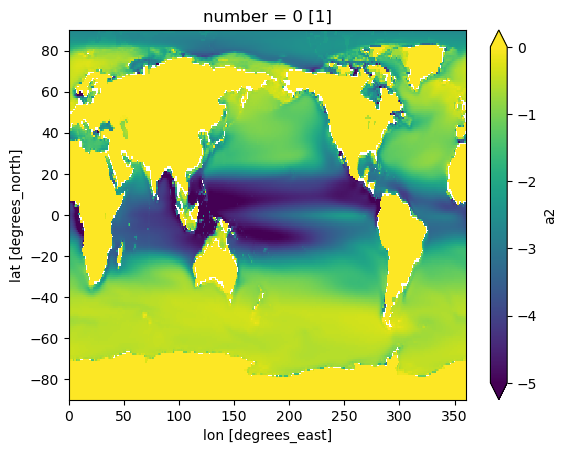

In [36]:
all_bias.a2.mean(('month','model')).plot(vmin=-5,vmax=0)


In [23]:
all_bias

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, month: 12, model: 22)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * model      (model) object 'E3SM-1-0' 'NorESM2-LM' ... 'GISS-E2' 'FIO-ESM2'
    number     int64 0
Data variables: (12/27)
    a1         (model, month, lat, lon) float64 ...
    a2         (model, month, lat, lon) float64 ...
    a3         (model, month, lat, lon) float64 ...
    D1         (model, month, lat, lon) float64 ...
    b3         (model, month, lat, lon) float64 ...
    Fs         (model, month, lat, lon) float64 -1.929e-09 ... -1.518e-07
    ...         ...
    std_D1     (month, lat, lon) float64 0.0 0.0 0.0 0.0 ... 19.57 19.5 19.59
    std_b3     (month, lat, lon) float64 0.0 0.0 0.0 ... 0.0001198 0.0001218
    std_Fs     (month, lat, lon) float64 0.0 0.0 0.0 ... 2.816e-08 2.819e-08
    std_Ft     (month, lat, lon) float64 nan nan nan ... 4.84e-08 4.847e-08
    std_curl   (month, lat, lon) float64 nan nan nan ... 4.108e-09 3.87e-09
    std_wsm    (month, lat, lon) float32 0.01655 0.01669 ... 0.01127 0.01129